# Exploratory Data Analysis

In [1]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import requests
import collections 
from collections import defaultdict
from bs4 import BeautifulSoup
import urllib3
urllib3.disable_warnings()
from urllib3 import request
from urllib.parse import urlparse
plt.style.use("fivethirtyeight")
import seaborn as sn

## Importing data

In [2]:
df = pd.read_csv('URL_dataset.csv')
df.columns

Index(['Unnamed: 0', 'URL', 'Result'], dtype='object')

In [3]:
def get_position(df):
    for i in range(len(df)):
        if(df['Result'][i] == 1):
            return i

In [4]:
get_position(df)

135135

In [5]:
Mal = df.iloc[135135:,:]
Mal

,Unnamed: 0,URL,Result
135135,135135,sinduscongoias.com.br/index.html,1
135136,135136,sinduscongoias.com.br/index.php/institucional.1,1
135137,135137,sinduscongoias.com.br/index.php/institucional/...,1
135138,135138,sinduscongoias.com.br/index.php/institucional/...,1
135139,135139,sinduscongoias.com.br/index.php/institucional/...,1
...,...,...,...
295359,295359,data-account-update.com,1
295360,295360,eleanorteddie.ru,1
295361,295361,greatcareson.info,1
295362,295362,blowsfactor.info,1


In [4]:
len(df)

295364

In [5]:
df

,Unnamed: 0,URL,Result
0,0,1337x.to/torrent/1048648/American-Sniper-2014-...,0
1,1,1337x.to/torrent/1110018/Blackhat-2015-RUSSIAN...,0
2,2,1337x.to/torrent/1122940/Blackhat-2015-x264-10...,0
3,3,1337x.to/torrent/1124395/Fast-and-Furious-7-20...,0
4,4,1337x.to/torrent/1145504/Avengers-Age-of-Ultro...,0
...,...,...,...
295359,295359,data-account-update.com,1
295360,295360,eleanorteddie.ru,1
295361,295361,greatcareson.info,1
295362,295362,blowsfactor.info,1


## Testing for each attribute

In [147]:
import urllib
Decoded_URL = list()
for i in range(len(df['URL'])):
    decoded_url = urllib.parse.unquote(df['URL'][i])
    Decoded_URL.append(decoded_url)

In [148]:
BracketRound = list ()
for i in Decoded_URL:
    if("(" in i):
        BracketRound.append(i)
print(BracketRound, len(BracketRound))

['http://nipponimportsltd.com/Images/same/index (3).php', 'http://winetimefinally.com/Linked/linkedIn/linkedIn (1)/linkedIn (1)/LinkedIn.html', 'https://winetimefinally.com/LinkedIn/linkedIn/linkedIn (1)/linkedIn (1)/LinkedIn.html', 'http://tshirtsforautism.com/fn/index (4).php'] 4


In [149]:
BracketCurly = list ()
for i in Decoded_URL:
    if("{" in i):
        BracketCurly.append(i)

In [150]:
BracketSquare = list ()
for i in Decoded_URL:
    if('[' in i):
        BracketSquare.append(i)

In [151]:
BracketAngular = list ()
for i in Decoded_URL:
    if('<' in i):
        BracketAngular.append(i)

In [152]:
BracketRoundClose = list ()
for i in Decoded_URL:
    if(")" in i):
        BracketRoundClose.append(i)

In [153]:
BracketCurlyClose = list ()
for i in Decoded_URL:
    if("}" in i):
        BracketCurlyClose.append(i)

In [154]:
BracketSquareClose = list ()
for i in Decoded_URL:
    if(']' in i):
        BracketSquareClose.append(i)

In [155]:
BracketAngularClose = list ()
for i in Decoded_URL:
    if('>' in i):
        BracketAngularClose.append(i)

In [156]:
AND = list ()
for i in Decoded_URL:
    if("&" in i):
        AND.append(i)

In [157]:
Question = list ()
for i in Decoded_URL:
    if("?" in i):
        Question.append(i)

In [158]:
Colon = list()
for i in Decoded_URL:
    if(i.count(':') > 1):
        Colon.append(i)

In [159]:
Exclaim = list()
for i in Decoded_URL:
    if("!" in i):
        Exclaim.append(i)

In [160]:
def extract_domain(u):
    domain = urlparse(u).netloc
    return domain

In [161]:
domains=[]
for i in df.URL:
    domains.append(extract_domain(i))

Prefix/Suffix in the domain name i.e. hyphen in the domains

In [162]:
Hyphen = list()
for i in df.index:
    if("-" in domains[i]):
        Hyphen.append(df['URL'][i])

In [163]:
Uscore = list()
for i in Decoded_URL:
    if("_" in i):
        Uscore.append(i)

In [164]:
Hash = list()
for i in Decoded_URL:
    if("#" in i):
        Hash.append(i)

In [165]:
AT = list()
for i in Decoded_URL:
    if("@" in i):
        AT.append(i)

In [166]:
Dslash = list()
for i in Decoded_URL:
    if(i.count('//') > 1):
        Dslash.append(i)

In [167]:
Dots = list()
for i in df.index:
    if(domains[i].count('.') > 2):
        Dots.append(df['URL'][i])

In [168]:
Space = list()
for i in Decoded_URL:
    if(i.count(' ') > 1):
        Space.append(i)

In [169]:
Dollar = list()
for i in Decoded_URL:
    if("$" in i):
        Dollar.append(i)

In [170]:
Plus = list()
for i in Decoded_URL:
    if("+" in i):
        Plus.append(i)

In [171]:
Star = list()
for i in Decoded_URL:
    if("*" in i):
        Star.append(i)

In [172]:
Comma = list()
for i in Decoded_URL:
    if("," in i):
        Comma.append(i)

In [173]:
SemiColon = list()
for i in Decoded_URL:
    if(";" in i):
        SemiColon.append(i)

In [174]:
Bslash = list()
for i in Decoded_URL:
    if('\\' in i):
        Bslash.append(i)

In [175]:
Sinv = list()
for i in Decoded_URL:
    if('\'' in i):
        Sinv.append(i)

In [176]:
Dinv = list()
for i in Decoded_URL:
    if('\"' in i):
        Dinv.append(i)

In [177]:
Or = list()
for i in Decoded_URL:
    if('^' in i):
        Or.append(i)

In [178]:
Tilde = list()
for i in Decoded_URL:
    if('~' in i):
        Tilde.append(i)

In [179]:
Equals = list()
for i in Decoded_URL:
    if('=' in i):
        Equals.append(i)

## Plotting results

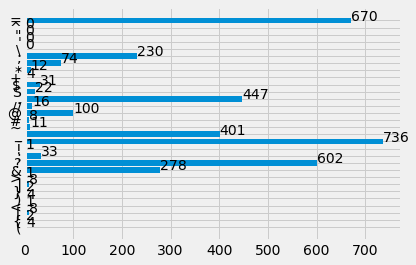

In [180]:
labels = ['(','{','[','<',')','}',']','>','&', '?', ':', '!', '-', '_', '~','#', '@', '//', '.', 'S', '$', '+', '*', ',', ';', '\\', '\'', '\"', '^', '=']
lengths = [len(BracketRound),len(BracketCurly),len(BracketSquare),len(BracketAngular),
           len(BracketRoundClose),len(BracketCurlyClose),len(BracketSquareClose),len(BracketAngularClose),
           len(AND), len(Question), len(Colon), len(Exclaim), len(Hyphen), len(Uscore), len(Tilde),
           len(Hash), len(AT), len(Dslash), len(Dots), len(Space), len(Dollar), len(Plus), len(Star), 
           len(Comma), len(SemiColon), len(Bslash), len(Sinv), len(Dinv), len(Or), len(Equals)]
plt.barh(labels, lengths)
for index, value in enumerate(lengths):
    plt.text(value, index, str(value))

In [43]:
DATACSV = list()
for i in range(len(lengths)):
    print(labels[i]," : ", lengths[i]/1256554)
    DATACSV.append(lengths[i]/1256554)

(  :  3.1833092728207464e-06
{  :  1.5916546364103732e-06
[  :  6.366618545641493e-06
<  :  7.958273182051866e-07
)  :  3.1833092728207464e-06
}  :  1.5916546364103732e-06
]  :  6.366618545641493e-06
>  :  7.958273182051866e-07
&  :  0.00022123999446104186
?  :  0.0004790880455595223
:  :  2.6262301500771157e-05
!  :  7.958273182051866e-07
-  :  0.0005857289061990173
_  :  0.0003191267546002798
~  :  8.754100500257052e-06


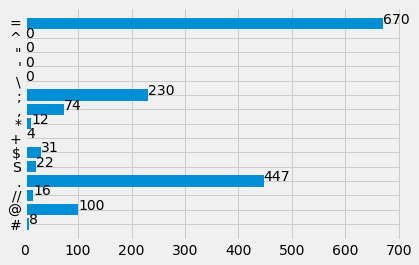

In [44]:
labels = ['#', '@', '//', '.', 'S', '$', '+', '*', ',', ';', '\\', '\'', '\"', '^', '=']
lengths = [len(Hash), len(AT),
           len(Dslash), len(Dots), len(Space), len(Dollar), len(Plus), len(Star), len(Comma), len(SemiColon), 
           len(Bslash), len(Sinv), len(Dinv), len(Or), len(Equals)]
plt.barh(labels, lengths)
for index, value in enumerate(lengths):
    plt.text(value, index, str(value))

In [140]:
# labels = ['(','{','[','<',')','}',']','>','&', '?', ':', '!', '-', '_', '~','#', '@', '//', '.', 'S'
#, '$', '+', '*', ',', ';', '\\', '\'', '\"', '^', '=']
Labels = ['OpenBracket', 'OpenFlower', 'OpenSquare',
       'OpenAngular', 'CloseBracket', 'CloseFlower', 'CloseSquare',
       'CloseAngular', 'And', 'Question', 'Colon', 'Exclamation', 'Hyphen',
       'Underscore', 'Tilde', 'Hash', 'At', 'DoubleSlash', 'Dot', 'Spaces',
       'Dollar', 'plus', 'Star', 'Comma', 'SemiColon', 'Backslash',
       'SingleInverted', 'DoubleInverted', 'Or', 'Equals']
for label in range(len(labels)):
    List_sym = list()
    for i in Decoded_URL:
        List_sym.append(i.count(labels[label]))
    df[Labels[label]] = List_sym

In [141]:
df

,Unnamed: 0,URL,Result,OpenBracket,OpenFlower,OpenSquare,OpenAngular,CloseBracket,CloseFlower,CloseSquare,...,Dollar,plus,Star,Comma,SemiColon,Backslash,SingleInverted,DoubleInverted,Or,Equals
0,0,1337x.to/torrent/1048648/American-Sniper-2014-...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1337x.to/torrent/1110018/Blackhat-2015-RUSSIAN...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,1337x.to/torrent/1122940/Blackhat-2015-x264-10...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,1337x.to/torrent/1124395/Fast-and-Furious-7-20...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,1337x.to/torrent/1145504/Avengers-Age-of-Ultro...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295359,295359,data-account-update.com,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
295360,295360,eleanorteddie.ru,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
295361,295361,greatcareson.info,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
295362,295362,blowsfactor.info,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [142]:
df.to_csv("URL_final.csv")

In [45]:
for i in range(len(lengths)):
    print(labels[i]," : ", lengths[i]/1256554)
    DMOZCSV.append(lengths[i]/1256554)

#  :  6.366618545641493e-06
@  :  7.958273182051865e-05
//  :  1.2733237091282986e-05
.  :  0.0003557348112377184
S  :  1.7508201000514104e-05
$  :  2.4670646864360785e-05
+  :  3.1833092728207464e-06
*  :  9.549927818462238e-06
,  :  5.8891221547183806e-05
;  :  0.00018304028318719292
\  :  0.0
'  :  0.0
"  :  0.0
^  :  0.0
=  :  0.000533204303197475


In [47]:
print(DATACSV, "\n", DMOZCSV)

[3.1833092728207464e-06, 1.5916546364103732e-06, 6.366618545641493e-06, 7.958273182051866e-07, 3.1833092728207464e-06, 1.5916546364103732e-06, 6.366618545641493e-06, 7.958273182051866e-07, 0.00022123999446104186, 0.0004790880455595223, 2.6262301500771157e-05, 7.958273182051866e-07, 0.0005857289061990173, 0.0003191267546002798, 8.754100500257052e-06] 
 [3.1833092728207464e-06, 1.5916546364103732e-06, 6.366618545641493e-06, 7.958273182051866e-07, 3.1833092728207464e-06, 1.5916546364103732e-06, 6.366618545641493e-06, 7.958273182051866e-07, 0.00022123999446104186, 0.0004790880455595223, 2.6262301500771157e-05, 7.958273182051866e-07, 0.0005857289061990173, 0.0003191267546002798, 8.754100500257052e-06, 6.366618545641493e-06, 7.958273182051865e-05, 1.2733237091282986e-05, 0.0003557348112377184, 1.7508201000514104e-05, 2.4670646864360785e-05, 3.1833092728207464e-06, 9.549927818462238e-06, 5.8891221547183806e-05, 0.00018304028318719292, 0.0, 0.0, 0.0, 0.0, 0.000533204303197475]


In [50]:
Ratios_1 = list()
for i in range(len(DATACSV)):
    print(DATACSV[i],"/",DMOZCSV[i],"=",DATACSV[i]/DMOZCSV[i])
    Ratios_1.append(DATACSV[i]/DMOZCSV[i])
Ratios_1

3.1833092728207464e-06 / 3.1833092728207464e-06 = 1.0
1.5916546364103732e-06 / 1.5916546364103732e-06 = 1.0
6.366618545641493e-06 / 6.366618545641493e-06 = 1.0
7.958273182051866e-07 / 7.958273182051866e-07 = 1.0
3.1833092728207464e-06 / 3.1833092728207464e-06 = 1.0
1.5916546364103732e-06 / 1.5916546364103732e-06 = 1.0
6.366618545641493e-06 / 6.366618545641493e-06 = 1.0
7.958273182051866e-07 / 7.958273182051866e-07 = 1.0
0.00022123999446104186 / 0.00022123999446104186 = 1.0
0.0004790880455595223 / 0.0004790880455595223 = 1.0
2.6262301500771157e-05 / 2.6262301500771157e-05 = 1.0
7.958273182051866e-07 / 7.958273182051866e-07 = 1.0
0.0005857289061990173 / 0.0005857289061990173 = 1.0
0.0003191267546002798 / 0.0003191267546002798 = 1.0
8.754100500257052e-06 / 8.754100500257052e-06 = 1.0


[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

In [181]:
def func(pct, allvals):
    absolute = int(round(pct/100.*np.sum(allvals)))
    return "{:.1f}%\n".format(pct, absolute)

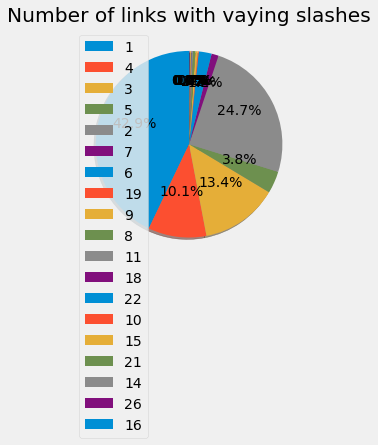

In [182]:
Lengths = dict ()
Keys = list ()
Values = list ()
for i in df.index:
    count = -2
    for j in df['URL'][i]:
        if(j == '/'):
            count += 1
    if(str(count) in Lengths):
        Lengths[str(count)] = Lengths[str(count)] + 1
    else:
        Lengths[str(count)] = 1
        #Keys.append(str(count))
for i,j in Lengths.items():
    Keys.append(i)
    Values.append(j)

plt.pie(Values, shadow = True, startangle = 90, autopct = lambda pct: func(pct, Values))
plt.title("Number of links with vaying slashes")
plt.legend(Keys)
plt.show()

In [183]:
X_to_sort = Keys
A1 = X_to_sort[0:5]
A2 = X_to_sort[5:10]
A3 = X_to_sort[10:15]
A4 = X_to_sort[15:20]
DD1 = defaultdict(list)
DD2 = defaultdict(list)
DD3 = defaultdict(list)
DD4 = defaultdict(list)
for i,j in Lengths.items():
    if i in A1:
        DD1[i] = Lengths[i]
    elif i in A2:
        DD2[i] = Lengths[i]
    elif i in A3:
        DD3[i] = Lengths[i]
    else:
        DD4[i] = Lengths[i]

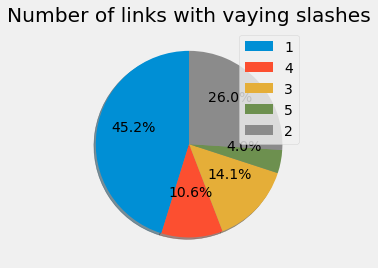

In [184]:
Keys_DD1 = list()
Values_DD1 = list()
for i,j in DD1.items():
    Keys_DD1.append(i)
    Values_DD1.append(j)
plt.pie(Values_DD1, shadow = True, startangle = 90, autopct = lambda pct: func(pct, Values_DD1))
plt.title("Number of links with vaying slashes")
plt.legend(Keys_DD1)
plt.show()

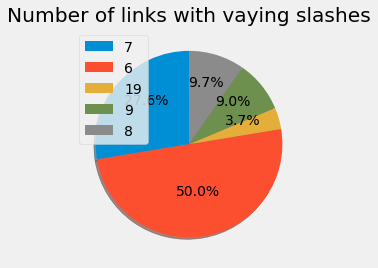

In [185]:
Keys_DD2 = list()
Values_DD2 = list()
for i,j in DD2.items():
    Keys_DD2.append(i)
    Values_DD2.append(j)
plt.pie(Values_DD2, shadow = True, startangle = 90, autopct = lambda pct: func(pct, Values_DD1))
plt.title("Number of links with vaying slashes")
plt.legend(Keys_DD2)
plt.show()

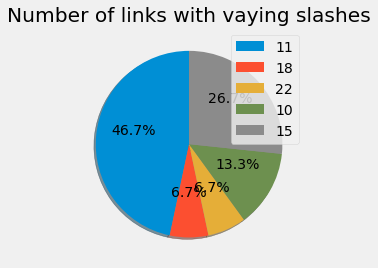

In [186]:
Keys_DD3 = list()
Values_DD3 = list()
for i,j in DD3.items():
    Keys_DD3.append(i)
    Values_DD3.append(j)
plt.pie(Values_DD3, shadow = True, startangle = 90, autopct = lambda pct: func(pct, Values_DD1))
plt.title("Number of links with vaying slashes")
plt.legend(Keys_DD3)
plt.show()

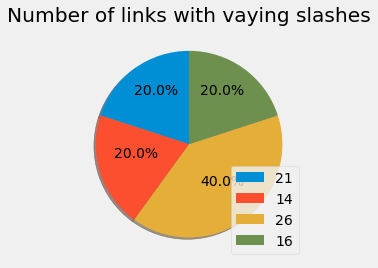

In [187]:
Keys_DD4 = list()
Values_DD4 = list()
for i,j in DD4.items():
    Keys_DD4.append(i)
    Values_DD4.append(j)
plt.pie(Values_DD4, shadow = True, startangle = 90, autopct = lambda pct: func(pct, Values_DD4))
plt.title("Number of links with vaying slashes")
plt.legend(Keys_DD4)
plt.show()

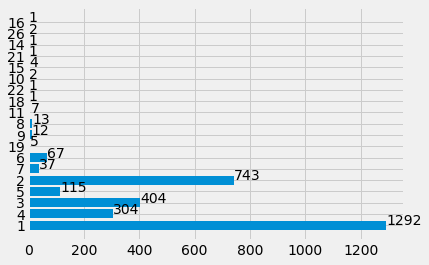

In [188]:
plt.barh(Keys, Values)
for index, value in enumerate(Values):
    plt.text(value, index, str(value))

In [59]:
def is_registered(domain_name):
    """A function that returns a boolean indicating whether a `domain_name` is registered"""
    try:
        w = whois.whois(domain_name)
    except Exception:
        return False
    else:
        return w.domain_name, w.creation_date, w.expiration_date

In [193]:
link_count = 0
DD = defaultdict(list)
DD_names = defaultdict(list)
for i in range(len(df)):
    #start_time =time.time()
    #while ((time.time() - start_time) < 5):
    count = 0
    with open(df['Filename'][i]) as fp:
        bSoup = BeautifulSoup(fp, 'html.parser')
    links1_list = bSoup.find_all('a')
    links2_list = bSoup.find_all('alt')
    links3_list = bSoup.find_all('src')
    links4_list = bSoup.find_all('link')
    link_count+=1
    for link in links1_list+links2_list+links3_list+links4_list:
        if 'href' in link.attrs:
            if(str(link.attrs['href'])==""):
                count+=1
    if(count != 0):
        if(count in DD):
            DD[count] += 1
        else:
            DD[count] = 1
        print(df['URL'][i], count)
        DD_names[df['URL'][i]] = count
    fp.close()

http://dqdq168.com/ 3
http://ddlawpartners.com/language/Chase/aadda70acb8c9d376e6c5e5f85664905 21
http://wbstormer.com/clow/dsbanknew/bg-BG/index.html?id=d60b548fba5d0943d3763d9b5e5530b8country=Bg 3
https://polymercenter.com.ua/Service/Ameli/ 1
https://chronopost-colis.livraisonclient.com/Remboursement/ 6
https://www.paliyabrothersinterior.com/granulla/DH2tAyUe9AsUx7b649 8
http://geminiirg.co.uk/zimbra/Zimbra%20main/3152253d53b52fee0f867c9d1 1
https://akassa.link/b/ditcaq017joj816vg/btbh/?order_id=48999029&order;_idNew=48999029 1
https://panelweb-4cae2.web.app/webmail-2096/index.htm 11
https://galconotary.com/612c210cf4c6e814dcf8d8fce583938e/verify.php?country_x=-&ACCT;_x=ID-PPL=PA32424.66.0.109=ScrPg=7a5e003d729e8d8dfd02ac627ec8aa2761b61909349cdf2e95c7e8092f7384a0S=$1$D.6XocW5$cf9ibs/SJECwtsrCmefZb1FyG42dKb0x8JptM7mO1iPlkBqaeghQrw6oLD3cREXVU5svTfnAHNSZ9IYCzjWuvEUkygQeZbSR8Or9PdIVmw64jqiC2TLG1oWJHt7AKcaXDxnBu0YlNMpsz35Ffh53297468219 19
https://polkastarter.walletconnect-support.net/ 2


https://rebirthcommunitycorp.com/b77cb0286f73109aac1a4a0f3423a990/verify.php?country_x=-&ACCT;_x=ID-PPL=PA324191.96.86.156=ScrPg=eaa12e5cbd78edaef93888b2e163d198e4293b4002b63af2352cf94240ea2066S=$1$QJ2Mo8o6$ugeKGU52fNbtzuUnncKNR/96iQq5jx4KME2CmFNRhAgfYB1vdIsOk0WZtu3eprDJSUyPXHzVwao8Tnb7LGclIzrQdvN2wLgPnfW8Xm4jyohukJMxOaZGYBH91EFRb5SsqCKVc60ti7Uel3TADp6150441097 19
http://test-test123.groupe-maillane.fr/admin/9730a 1
http://test-test123.groupe-maillane.fr/admin/13799/ 1
http://www-cursosdigitalesmx-com.filesusr.com/html/3e0bdd_e8b0b5ae4dc3befcc395d02342c163a1.html 1
https://qtflg.cn/mww0j/r0sl.php 12
http://apptoday.co/voice3/vendor/Secure/load 5
http://test-test123.groupe-maillane.fr/admin/931a8 1
http://test-test123.groupe-maillane.fr/admin/06cef 1
http://trickgamesparty.com/event 1
https://www.logitel.com.au/netflixsupport/alldetails.html 2
https://agencyproductionhouse.com/e7a4a86c64c5dd082e999bbf890bbd8e/verify.php?country_x=-&ACCT;_x=ID-PPL=PA324198.240.101.57=ScrPg=bb4e7ab9322edd

http://gfnnwrejj8sy1292hbavzel4evhg.qo115mqstsk5kp2kq.rockhopperexplorationplc.co.uk/hg19qzu5qrk2z7g/15t7d6d148t46/cf193tv8mgkm7ab/q1h2qpuzle8ovj/gqm6igdkxik3bsc/qpk5l2pecrg2zpv/nvb47vdgvpa713tajna9hfcn0g 21
http://top-gerls-vk-groupe.ru/index.php?id= 2
http://top-gerls-vk-groupe.ru/vk/ 2
https://freeoplata.org.ru/b/fprbgc4nrjfpxabflpm/bw9c/?order_id=49118015&order;_idNew=49118015 1
https://freeoplata.org.ru/b/bnm8538fmqw0r3h11m2/g1fb/?order_id=49118172&order;_idNew=49118172 1
https://freeoplata.org.ru/b/hf0yddnbhibyvlo/bw9c/?order_id=49118231&order;_idNew=49118231 1
http://mandato.com.br/wp-includes/random_compat/edc/b960d/home 1
http://signin.ebay.de.whyymedia.com.au/ 3
http://sjgnin.immowetl.de.utmvu.com/ 1
http://sukienvngpubgmobile.net/ 2
https://freeoplata.org.ru/b/t4tl287hc53757k7iptfjhi/bw9c/?order_id=49118471&order;_idNew=49118471 1
http://54olh3ouquem2021.starvillam.com/ 4
http://tenutatrecancelli.com/turk 7
https://freeoplata.org.ru/b/nryg4g14cpi3c6dnf87sq34/vbem/?order_id=4

In [215]:
import time
Labels = ['!--...--','!DOCTYPE','a', 'abbr','acronym','address','applet','area','article','aside','audio','b',
          'base','basefont','bdi','bdo','big','blockquote','body','br','button','canvas','caption','center','cite',
          'code','col','colgroup','data','datalist','dd','del','details','dfn','dialog','dir','div','dl','dt','em',
          'embed','fieldset','figcaption','figure','font','footer','form','frame','frameset','h1','h2','h3','h4',
          'h5','h6','head','header','hr','html','i','iframe','img','input','ins','kbd','label','legend','li',
          'link','main','map','mark','meta','meter','nav','noframes','noscript','object','ol','optgroup','option',
          'output','p','param','picture','pre','progress','q','rp','rt','ruby','s','samp','script','section',
          'select','small','source','span','strike','strong','style','sub','summary','sup','svg','table','tbody',
          'td','template','textarea','tfoot','th','thead','time','title,','tr','track','tt','u','ul','var','video',
          'wbr']
for label in range(len(Labels)):
    start = time.time()
    print("Running for",Labels[label],"...")
    links_list = []
    for i in range(len(df)):
        with open(df['Filename'][i]) as fp:
            bSoup = BeautifulSoup(fp, 'html.parser')
        Count = len(bSoup.find_all(Labels[label]))
        links_list.append(Count)
        fp.close()
    df[Labels[label]] = links_list
    end = time.time()
    print("Finished execution for",Labels[label],"with execution time:",end-start)
df

Running for !--...-- ...
Finished execution for !--...-- with execution time: 28.554914712905884
Running for !DOCTYPE ...
Finished execution for !DOCTYPE with execution time: 28.6184344291687
Running for a ...
Finished execution for a with execution time: 24.138147115707397
Running for abbr ...
Finished execution for abbr with execution time: 23.875540018081665
Running for acronym ...
Finished execution for acronym with execution time: 23.807370901107788
Running for address ...
Finished execution for address with execution time: 23.76995062828064
Running for applet ...
Finished execution for applet with execution time: 28.430922269821167
Running for area ...
Finished execution for area with execution time: 23.677180528640747
Running for article ...
Finished execution for article with execution time: 28.36415147781372
Running for aside ...
Finished execution for aside with execution time: 28.47615671157837
Running for audio ...
Finished execution for audio with execution time: 46.680114

Finished execution for samp with execution time: 48.94229292869568
Running for script ...
Finished execution for script with execution time: 36.18264436721802
Running for section ...
Finished execution for section with execution time: 31.65128254890442
Running for select ...
Finished execution for select with execution time: 35.078728914260864
Running for small ...
Finished execution for small with execution time: 26.238471746444702
Running for source ...
Finished execution for source with execution time: 30.76714015007019
Running for span ...
Finished execution for span with execution time: 31.42773127555847
Running for strike ...
Finished execution for strike with execution time: 60.808852672576904
Running for strong ...
Finished execution for strong with execution time: 69.60902905464172
Running for style ...
Finished execution for style with execution time: 37.86591029167175
Running for sub ...
Finished execution for sub with execution time: 43.037182092666626
Running for summary .

,Index,URL,Filename,!--...--,!DOCTYPE,a,abbr,acronym,address,applet,...,time,"title,",tr,track,tt,u,ul,var,video,wbr
0,0,http://dqdq168.com/,f0.html,0,0,75,0,0,0,0,...,0,0,0,0,0,0,24,0,0,0
1,1,https://mypay.pictures/b/5ubou7a5o68bc7mkzt/vb...,f1.html,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,http://ddlawpartners.com/language/Chase/aadda7...,f2.html,0,0,18,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,3,http://www.alansihouse.com/collections/phone-c...,f3.html,0,0,137,0,0,0,0,...,0,0,0,0,0,0,15,0,0,0
4,4,http://a7gsiwd.goodseo.tw/profile.html?countUs...,f4.html,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3007,3007,http://future-literate-appendix.glitch.me/,f3007.html,0,0,50,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3008,3008,https://password-authentication-73350.web.app/...,f3008.html,0,0,16,0,0,0,0,...,0,0,0,0,0,0,4,0,0,0
3009,3009,http://prevail1225.com/wp/applicant/home.php?a...,f3009.html,0,0,0,0,0,0,0,...,0,0,10,0,0,0,0,0,0,0
3010,3010,http://plaunch-copyrighted-fb-9068212349.premi...,f3010.html,0,0,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [216]:
df.to_csv('URL_attributes.csv')

In [209]:
import time
Dict_labels = defaultdict()
test_labels = ['img', 'html', 'a']
for label in range(len(test_labels)):
    start = time.time()
    print("Running for",test_labels[label],"...")
    links_list = []
    for i in range(len(df)):
        with open(df['Filename'][i]) as fp:
            bSoup = BeautifulSoup(fp, 'html.parser')
        Count = len(bSoup.find_all(test_labels[label]))
        links_list.append(Count)
        fp.close()
    Dict_labels[test_labels[label]] = links_list
    end = time.time()
    print("Finished execution for",test_labels[label],"with execution time:",end-start)

Running for img ...
Finished execution for img with execution time: 22.206993341445923
Running for html ...
Finished execution for html with execution time: 22.289963960647583
Running for a ...
Finished execution for a with execution time: 22.49848771095276


In [ ]:
'''
Labels = ['OpenBracket', 'OpenFlower', 'OpenSquare',
       'OpenAngular', 'CloseBracket', 'CloseFlower', 'CloseSquare',
       'CloseAngular', 'And', 'Question', 'Colon', 'Exclamation', 'Hyphen',
       'Underscore', 'Tilde', 'Hash', 'At', 'DoubleSlash', 'Dot', 'Spaces',
       'Dollar', 'plus', 'Star', 'Comma', 'SemiColon', 'Backslash',
       'SingleInverted', 'DoubleInverted', 'Or', 'Equals']
for label in range(len(labels)):
    List_sym = list()
    for i in Decoded_URL:
        List_sym.append(i.count(labels[label]))
    df[Labels[label]] = List_sym
'''

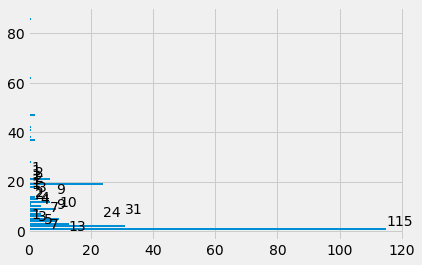

In [ ]:
Keys_1 = list()
Values_1 = list()
for i,j in DD.items():
    Keys_1.append(i)
    Values_1.append(j)
plt.barh(Keys_1, Values_1)
for index, value in enumerate(Values_1):
    plt.text(value, index, str(value))

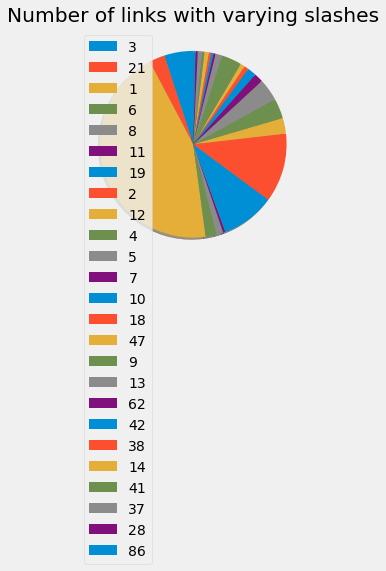

In [ ]:
plt.pie(Values_1, shadow = True, startangle = 90)
plt.title("Number of links with varying slashes")
plt.legend(Keys_1)
plt.show()

<BarContainer object of 25 artists>

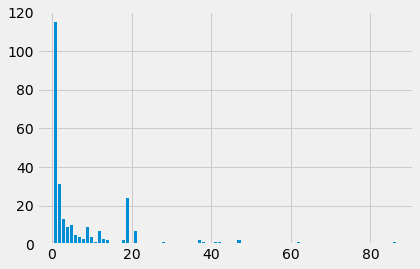

In [ ]:
plt.bar(Keys_1, Values_1)

In [ ]:
import plotly.express as px
import pandas as pd
#df = pd.Series(Keys, Values).to_frame()
df = pd.DataFrame(list(zip(Keys, Values)),
               columns =['Keys', 'Values'])
fig = px.line_polar(df, r='Keys', theta='Values', line_close=True)
fig.show()

In [30]:
dmoz = pd.read_csv('DMOZ.csv')
dmoz

,Unnamed: 0,URL
0,0,http://www.liquidgeneration.com/
1,1,http://www.onlineanime.org/
2,2,http://www.ceres.dti.ne.jp/~nekoi/SENNO/SENfir...
3,3,http://www.galeon.com/kmh/
4,4,http://archive.rhps.org/fritters/yui/index.html
...,...,...
1256549,1256549,http://www.maxpreps.com/
1256550,1256550,http://www.myscore.com/
1256551,1256551,http://sportsillustrated.cnn.com/highschool
1256552,1256552,http://rss.cnn.com/rss/si_highschool?format=xml


In [31]:
BracketRound_1 = list ()
for i in dmoz.index:
    if("(" in dmoz['URL'][i]):
        BracketRound_1.append(dmoz['URL'][i])

In [32]:
BracketCurly_1 = list ()
for i in dmoz.index:
    if("{" in dmoz['URL'][i]):
        BracketCurly_1.append(dmoz['URL'][i])

In [33]:
BracketSquare_1 = list ()
for i in dmoz.index:
    if('[' in dmoz['URL'][i]):
        BracketSquare_1.append(dmoz['URL'][i])

In [104]:
BracketAngular_1 = list ()
for i in dmoz.index:
    if(('<' or '%3C') in dmoz['URL'][i]):
        BracketAngular_1.append(dmoz['URL'][i])

In [35]:
BracketRoundClose_1 = list ()
for i in dmoz.index:
    if(")" in dmoz['URL'][i]):
        BracketRoundClose_1.append(dmoz['URL'][i])

In [36]:
BracketCurlyClose_1 = list ()
for i in dmoz.index:
    if("}" in dmoz['URL'][i]):
        BracketCurlyClose_1.append(dmoz['URL'][i])

In [37]:
BracketSquareClose_1 = list ()
for i in dmoz.index:
    if(']' in dmoz['URL'][i]):
        BracketSquareClose_1.append(dmoz['URL'][i])

In [105]:
BracketAngularClose_1 = list ()
for i in dmoz.index:
    if(('>' or '%3E') in dmoz['URL'][i]):
        BracketAngularClose_1.append(dmoz['URL'][i])

In [39]:
AND_1 = list ()
for i in dmoz.index:
    if("&" in dmoz['URL'][i]):
        AND_1.append(dmoz['URL'][i])

In [40]:
QUESTION_1 = list ()
for i in dmoz.index:
    if("?" in dmoz['URL'][i]):
        QUESTION_1.append(dmoz['URL'][i])

In [41]:
COLON_1 = list ()
for i in dmoz.index:
    if(dmoz['URL'][i].count(':') > 1):
        COLON_1.append(dmoz['URL'][i])

In [42]:
EXCLAIM_1 = list ()
for i in dmoz.index:
    if("!" in dmoz['URL'][i]):
        EXCLAIM_1.append(dmoz['URL'][i])

In [43]:
domains_1=[]
for i in dmoz.URL:
  domains_1.append(extract_domain(i))

Checking for prefix/suffix in domain for legitimate URLs i.e. hyphen in the domains

In [44]:
HYPHEN_1 = list ()
for i in dmoz.index:
    if("-" in domains_1[i]):
        HYPHEN_1.append(dmoz['URL'][i])

In [45]:
USCORE_1 = list ()
for i in dmoz.index:
    if("_" in dmoz['URL'][i]):
        USCORE_1.append(dmoz['URL'][i])

In [46]:
HASH_1 = list ()
for i in dmoz.index:
    if("#" in dmoz['URL'][i]):
        HASH_1.append(dmoz['URL'][i])

In [47]:
AT_1 = list ()
for i in dmoz.index:
    if("@" in dmoz['URL'][i]):
        AT_1.append(dmoz['URL'][i])

In [48]:
DSLASH_1 = list()
for i in dmoz.index:
    if(dmoz['URL'][i].count('//') > 1):
        Dslash.append(dmoz['URL'][i])

In [49]:
DOTS_1 = list()
for i in dmoz.index:
    if(domains_1[i].count('.') > 1):
        Dots.append(dmoz['URL'][i])

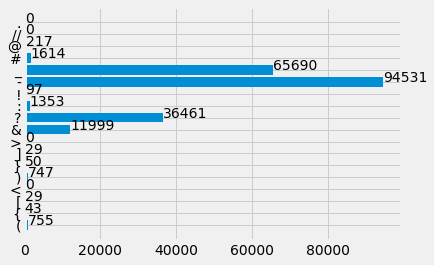

In [106]:
labels_dmoz = ['(','{','[','<',')','}',']','>','&', '?', ':', '!', '-', '_', '#', '@', '//', '.']
lengths_dmoz = [len(BracketRound_1),len(BracketCurly_1),len(BracketSquare_1),len(BracketAngular_1),
           len(BracketRoundClose_1),len(BracketCurlyClose_1),len(BracketSquareClose_1),len(BracketAngularClose_1),len(AND_1), len(QUESTION_1), len(COLON_1), len(EXCLAIM_1), len(HYPHEN_1), len(USCORE_1), len(HASH_1), len(AT_1), len(DSLASH_1), len(DOTS_1)]
plt.barh(labels_dmoz, lengths_dmoz)
for index, value in enumerate(lengths_dmoz):
    plt.text(value, index, str(value))

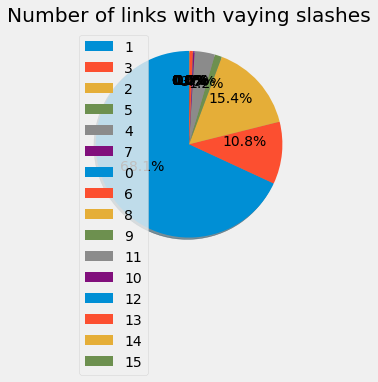

In [53]:
Lengths_dmoz = defaultdict()
Keys_dmoz = list ()
Values_dmoz = list ()
for i in dmoz.index:
    count = -2
    for j in dmoz['URL'][i]:
        if(j == '/'):
            count += 1
    if((str(count) in Lengths_dmoz)):
        Lengths_dmoz[str(count)] = Lengths_dmoz[str(count)] + 1
    else:
        Lengths_dmoz[str(count)] = 1
del Lengths_dmoz["-2"]
for i,j in Lengths_dmoz.items():
    Keys_dmoz.append(i)
    Values_dmoz.append(j)

plt.pie(Values_dmoz, shadow = True, startangle = 90, autopct = lambda pct: func(pct, Values_dmoz))
plt.title("Number of links with vaying slashes")
plt.legend(Keys_dmoz)
plt.show()

In [54]:
Ad1 = Keys_dmoz[0:6]
Ad2 = Keys_dmoz[7:12]
Ad3 = Keys_dmoz[13:]
DDd1 = defaultdict(list)
DDd2 = defaultdict(list)
DDd3 = defaultdict(list)
for i,j in Lengths_dmoz.items():
    if i in Ad1:
        DDd1[i] = Lengths_dmoz[i]
    elif i in Ad2:
        DDd2[i] = Lengths_dmoz[i]
    else:
        DDd3[i] = Lengths_dmoz[i]

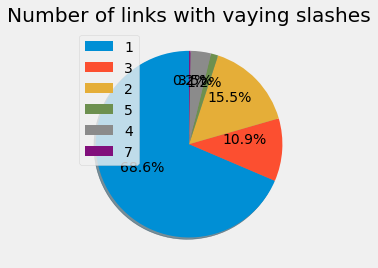

In [55]:
Keys_DDd1 = list()
Values_DDd1 = list()
for i,j in DDd1.items():
    Keys_DDd1.append(i)
    Values_DDd1.append(j)
plt.pie(Values_DDd1, shadow = True, startangle = 90, autopct = lambda pct: func(pct, Values_DDd1))
plt.title("Number of links with vaying slashes")
plt.legend(Keys_DDd1)
plt.show()

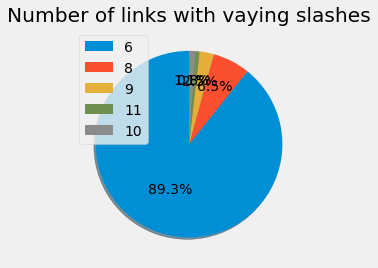

In [56]:
Keys_DDd2 = list()
Values_DDd2 = list()
for i,j in DDd2.items():
    Keys_DDd2.append(i)
    Values_DDd2.append(j)
plt.pie(Values_DDd2, shadow = True, startangle = 90, autopct = lambda pct: func(pct, Values_DDd2))
plt.title("Number of links with vaying slashes")
plt.legend(Keys_DDd2)
plt.show()

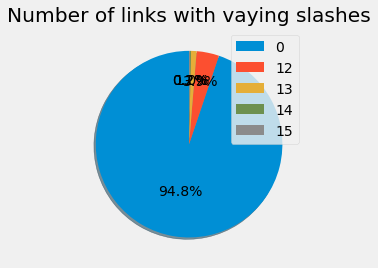

In [57]:
Keys_DDd3 = list()
Values_DDd3 = list()
for i,j in DDd3.items():
    Keys_DDd3.append(i)
    Values_DDd3.append(j)
plt.pie(Values_DDd3, shadow = True, startangle = 90, autopct = lambda pct: func(pct, Values_DDd3))
plt.title("Number of links with vaying slashes")
plt.legend(Keys_DDd3)
plt.show()

In [ ]:
plt.barh(Keys_dmoz, Values_dmoz)
for index, value in enumerate(Values_dmoz):
    plt.text(value, index, str(value))

In [ ]:
3/2785

0.0010771992818671453

In [ ]:
29/len(dmoz)

2.3078992227950412e-05

In [103]:
count = 1
for i in df['URL']:
    if("%3C" in i):
        print(count, i)
        count += 1

1 http://53fe93ee4b.000webhostapp.com/fh/SunTrustOnline-Zelle/Online/login/Data/6r2gfb6sfh6b14s6w546bh541tsw64b1hsw/1/1.html?%3C?php%20echo%20$negara.$z.$Anon.$x.$Isma.$z.$nama_negara;%20?%3E


In [62]:
MAX_df = pd.read_csv("URL_dataset.csv")
MAX_df

,Unnamed: 0,URL,Result
0,0,1337x.to/torrent/1048648/American-Sniper-2014-...,0
1,1,1337x.to/torrent/1110018/Blackhat-2015-RUSSIAN...,0
2,2,1337x.to/torrent/1122940/Blackhat-2015-x264-10...,0
3,3,1337x.to/torrent/1124395/Fast-and-Furious-7-20...,0
4,4,1337x.to/torrent/1145504/Avengers-Age-of-Ultro...,0
...,...,...,...
295359,295359,data-account-update.com,1
295360,295360,eleanorteddie.ru,1
295361,295361,greatcareson.info,1
295362,295362,blowsfactor.info,1
